In [1]:
# Import modules
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Read csv file
csv_path1 = os.path.join('raw_data','city_data.csv')
csv_path2 = os.path.join('raw_data','ride_data.csv')
# Get city and ride data into a DataFrame
city_df = pd.read_csv(csv_path1)
ride_df = pd.read_csv(csv_path2)
# Merge City and Ride Data
city_ride = city_df.merge(ride_df)
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:
# Group Data based on City
city_group = city_ride.groupby(["city"])
# Calculate Average Fare 
avg_fare = city_group["fare"].mean()
# Calculate Ride Count
ride_count = city_group["ride_id"].count()
# Create a DataFrame
temp_df = pd.DataFrame({                       
                       "average_fair": avg_fare,
                       "ride_count": ride_count
                       })

pyber_df = temp_df.merge(city_df, left_index=True, right_on="city")
pyber_df = pyber_df[["type","city","average_fair","ride_count","driver_count"]]
pyber_df.set_index("city").head()
# print(pyber_df.count())
# print(pyber_df.groupby("type")["driver_count"].sum())

,type,average_fair,ride_count,driver_count
city,,,,
Alvarezhaven,Urban,23.928710,31,21
Alyssaberg,Urban,20.609615,26,67
Anitamouth,Suburban,37.315556,9,16
Antoniomouth,Urban,23.625000,22,21
Aprilchester,Urban,21.981579,19,49


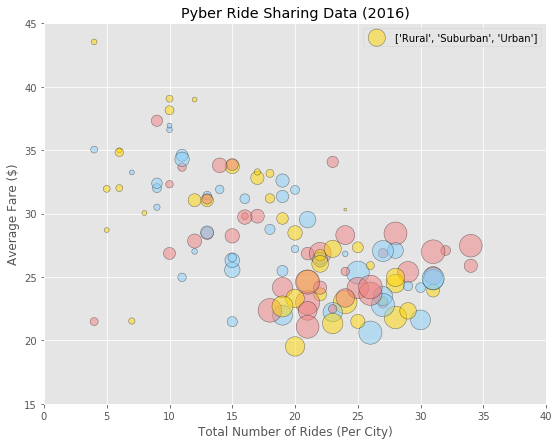

In [4]:
# Bubble Plot of Ride Sharing Data - Plot #1
# Set the Data for Bubble Plot
x = pyber_df["ride_count"]
y = pyber_df["average_fair"]
size = pyber_df["driver_count"]
colors = ['gold', 'lightskyblue', 'lightcoral']
city_type = ['Rural','Suburban','Urban']

# Set Graph Properties
plt.style.use('ggplot')
fig = plt.figure(figsize=(9,7))
plt.scatter(x,y, s=size*8, c=colors, alpha=0.5, edgecolor='black',label=city_type)
plt.legend(loc="best")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)') 

plt.xlim(0,40)
plt.ylim(15,45)

# Save the figure
plt.savefig("Ride_Sharing.png")

# Show Plot
plt.show()


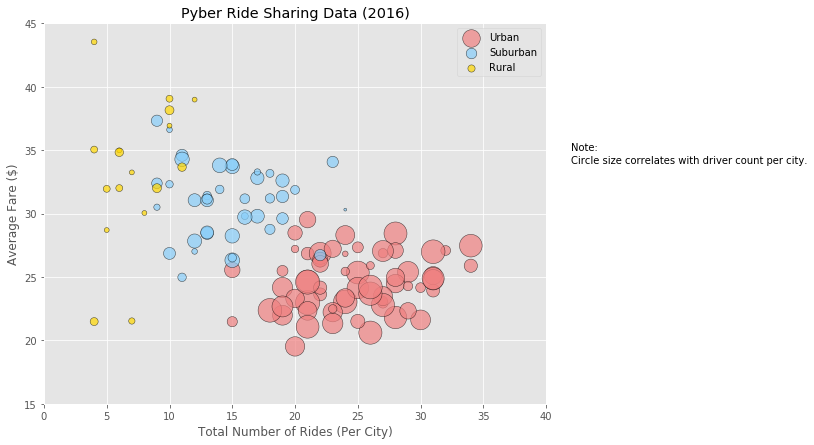

In [12]:
# Split the data by City Type
urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburb_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

# Plot Graph
fig = plt.figure(figsize=(9,7))
urban = plt.scatter(urban_df["ride_count"],urban_df["average_fair"], s=urban_df["driver_count"]*8, c='lightcoral', alpha=0.7, edgecolor='black',label="Urban")
suburb = plt.scatter(suburb_df["ride_count"],suburb_df["average_fair"], s=suburb_df["driver_count"]*8, c='lightskyblue', alpha=0.7, edgecolor='black',label="Suburban")
rural = plt.scatter(rural_df["ride_count"],rural_df["average_fair"], s=rural_df["driver_count"]*8, c='gold', alpha=0.7, edgecolor='black',label="Rural")

# Set Graph properties
plt.legend(loc="best")
plt.xlim(0,40)
plt.ylim(15,45)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)') 
plt.text(42, 35, 'Note:')
plt.text(42, 34, 'Circle size correlates with driver count per city.')
# Save the figure
plt.savefig("Ride_Sharing_3.png")

# Show Plot
plt.show()


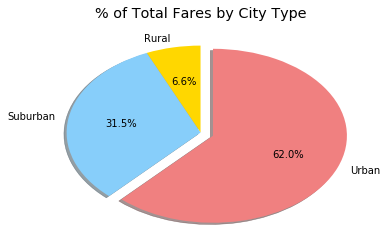

In [6]:
# Pie Charts
# 1.% of Total Fares by City Type
# Group Data based on City Type for Pie Chart
city_type_group = city_ride.groupby("type")
# Calculate Total Fair
total_fare = city_ride["fare"].sum()
# Calculate Percentage Fare for each City Type
fare_percentage = round(((city_type_group["fare"].sum()/total_fare)*100),2)
# Set the labels and colors of Pie
labels = ["Rural","Suburban","Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
sizes = fare_percentage
explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. 'Urban')
# Plot Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Fares by City Type")
# Show Plot
plt.show()


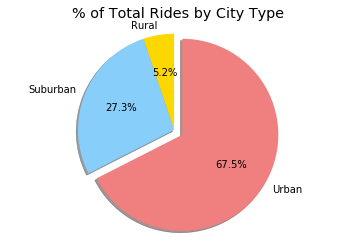

In [7]:
# 2.% of Total Rides by City Type
# Calculate Total Rides
total_rides = city_ride["ride_id"].count()
# Calculate Ride Percentage
ride_percentage = round(((city_type_group["ride_id"].count()/total_rides)*100),2)
sizes = ride_percentage
explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. 'Urban')
# Plot Pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% of Total Rides by City Type")
# Show Plot
plt.show()

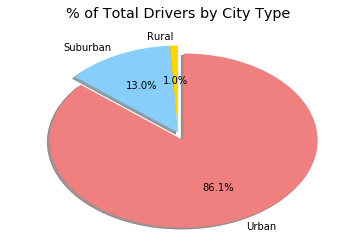

In [8]:
# 3. % of Total Drivers by City Type
# Calculate Total Driver Count
total_driver_count = city_ride["driver_count"].sum()
# Calculate Percentage of Total Drivers
driver_percentage = round(((city_type_group["driver_count"].sum()/total_driver_count)*100),2)

sizes = driver_percentage
explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. 'Urban')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Drivers by City Type")

# show plot
plt.show()